In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from env import get_db_url, username, password, host
from pydataset import data

## Iris Dataset

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1. What does the distribution of petal lengths look like?

<AxesSubplot:>

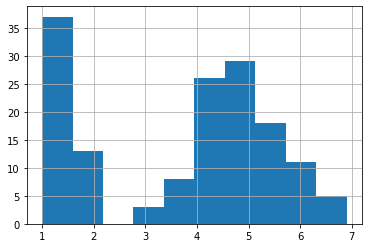

In [4]:
iris.petal_length.hist()

#### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

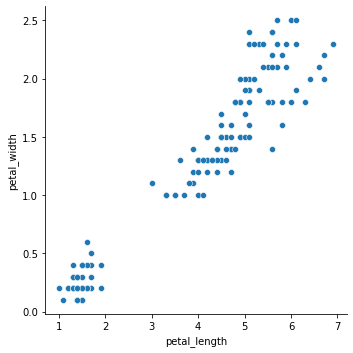

In [5]:
sns.relplot(x='petal_length', y='petal_width', data=iris)
# there appears to be a strong correlation, based on the visualization below

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

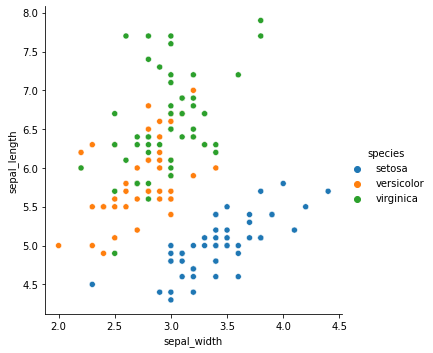

In [6]:
sns.relplot(x='sepal_width', y='sepal_length', hue='species', data=iris)
# given that there are visually apparent clusters of data, this would be a reasonable method of prediction

#### 4. Which features would be best used to predict species? 

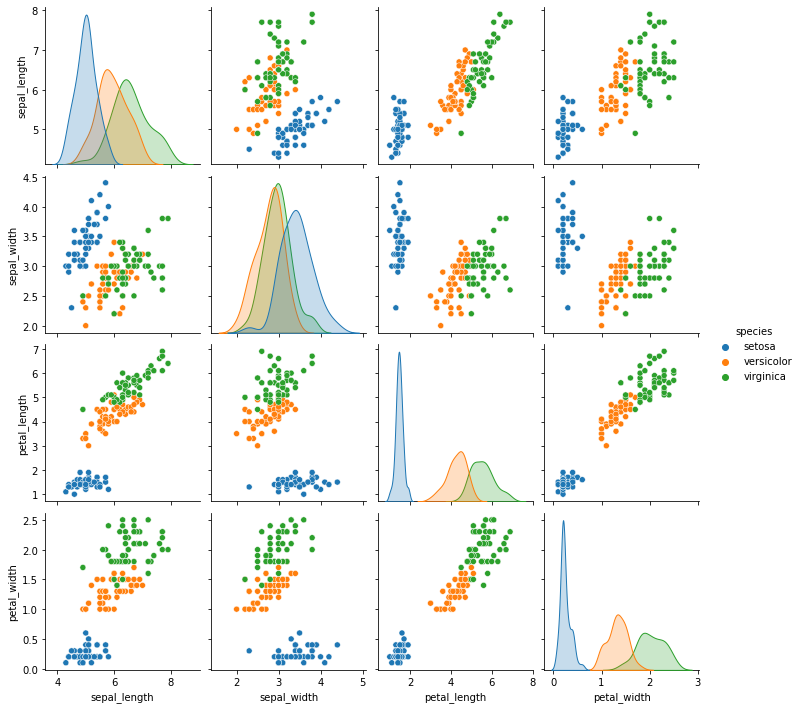

In [7]:
sns.pairplot(iris, hue='species')
# TODO ____________________
# _________________________

## Anscombe Dataset

#### Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

In [8]:
ansc = sns.load_dataset('anscombe')
ansc.sample(10)

,dataset,x,y
41,IV,8.0,5.56
42,IV,8.0,7.91
27,III,14.0,8.84
17,II,6.0,6.13
39,IV,8.0,5.25
14,II,9.0,8.77
12,II,8.0,8.14
5,I,14.0,9.96
19,II,12.0,9.13
3,I,9.0,8.81


#### 1. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [9]:
ansc.groupby('dataset').describe()
# the summary statistics are the same

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

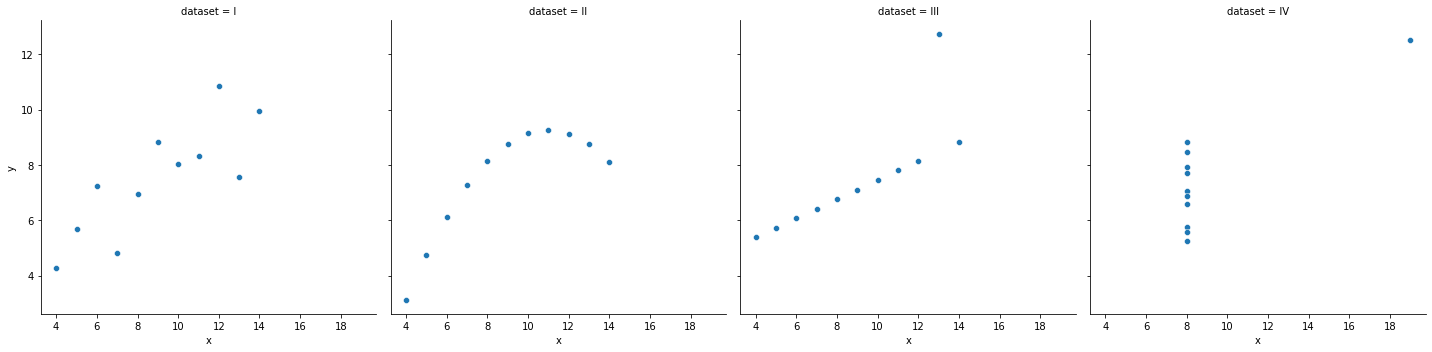

In [10]:
rows = 1
cols = 4

sns.relplot(x='x', y='y', col='dataset', data=ansc)
plt.show()

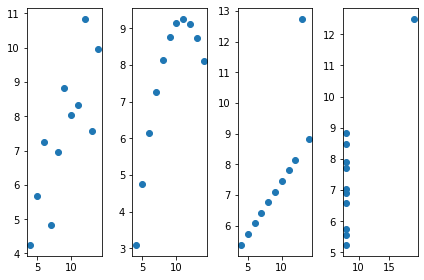

In [11]:
# using pyplot:

rows = 1
cols = 4

plt.subplot(rows, cols, 1)
plt.scatter(ansc.x[ansc.dataset == 'I'], ansc.y[ansc.dataset == 'I'])

plt.subplot(rows, cols, 2)
plt.scatter(ansc.x[ansc.dataset == 'II'], ansc.y[ansc.dataset == 'II'])

plt.subplot(rows, cols, 3)
plt.scatter(ansc.x[ansc.dataset == 'III'], ansc.y[ansc.dataset == 'III'])

plt.subplot(rows, cols, 4)
plt.scatter(ansc.x[ansc.dataset == 'IV'], ansc.y[ansc.dataset == 'IV'])

plt.tight_layout()

plt.show()

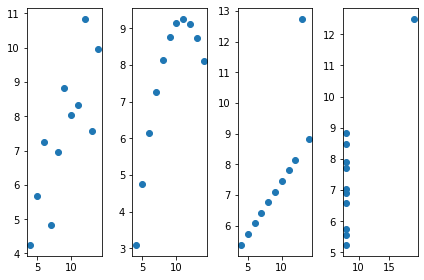

In [12]:
# using pyplot with a loop:
rows, cols = 1, 4
lst = [(1, 'I'), (2, 'II'), (3, 'III'), (4, 'IV')]

for tup in lst:
    plt.subplot(rows, cols, tup[0])
    plt.scatter(ansc.x[ansc.dataset == tup[1]], ansc.y[ansc.dataset == tup[1]])

plt.tight_layout()

plt.show()

## InsectSprays dataset

#### 1. Load the InsectSprays dataset and read it's documentation. 

In [13]:
sprays = data('InsectSprays')

In [14]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [15]:
sprays.sample(10).sort_values(by='spray')

,count,spray
10,20,A
7,10,A
9,17,A
21,19,B
36,4,C
35,1,C
47,2,D
40,6,D
55,1,E
56,1,E


#### Create a boxplot that shows the effectiveness of the different insect sprays.

Text(0, 0.5, 'insects remaining')

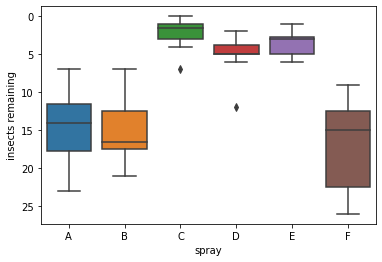

In [16]:
sns.boxplot(data=sprays, y='count', x='spray').invert_yaxis()
plt.ylabel('insects remaining')

## Swiss dataset

#### Load the swiss dataset and read it's documentation.

In [17]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [18]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


#### Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [19]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


#### Does whether or not a province is Catholic influence fertility?

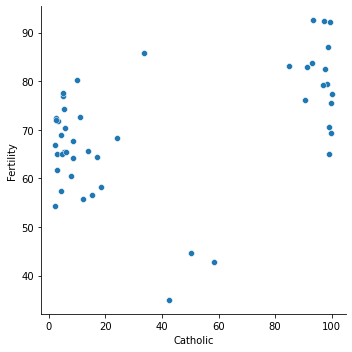

In [20]:
sns.relplot(x=swiss.Catholic, y=swiss.Fertility)
plt.show()
# a province's "catholic-ness" does not appear to have a strong
# correlation with the province's fertility

#### What measure correlates most strongly with fertility?

In [21]:
swiss = swiss.iloc[:,:-1] # removing the is_catholic boolean column

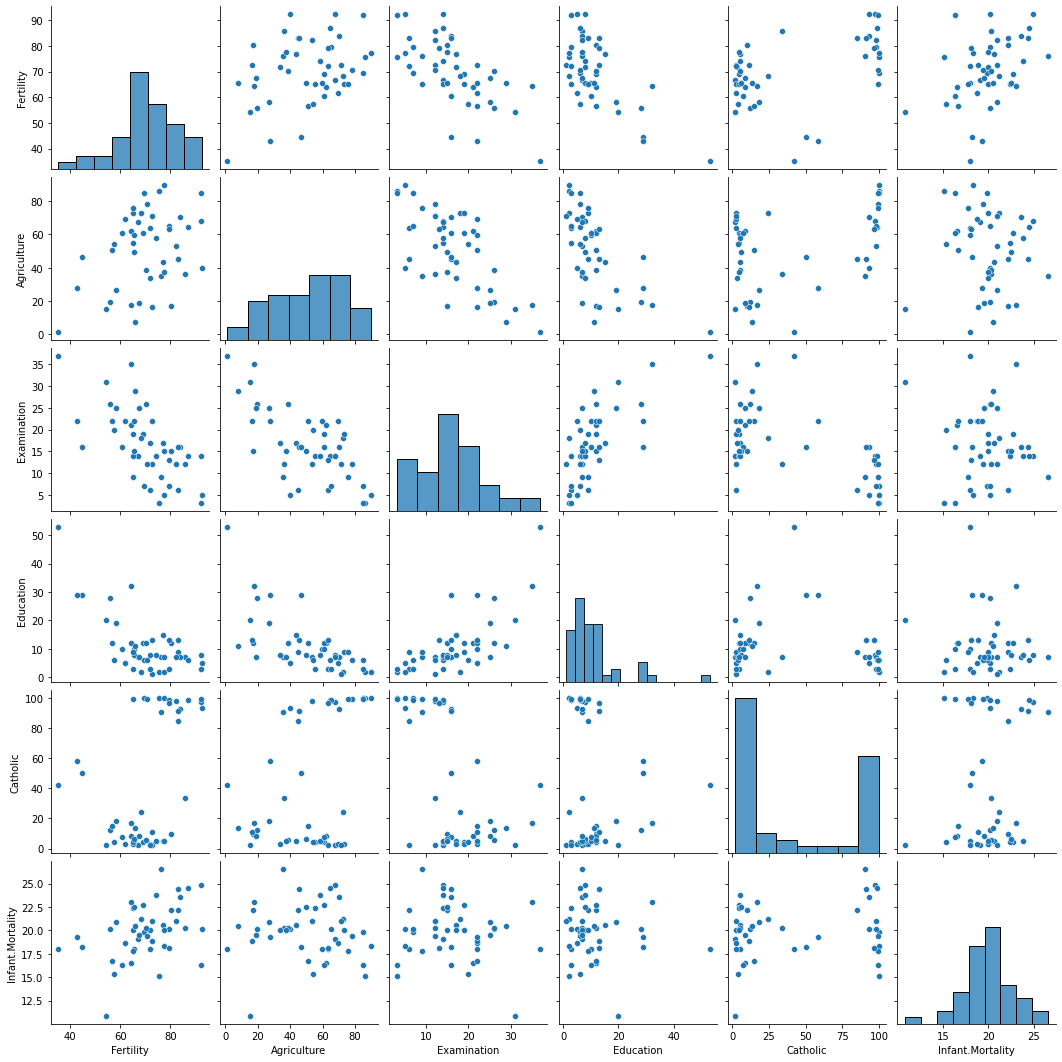

In [22]:
sns.pairplot(swiss)
# based on a simple visual analysis of the plots below, 'examination' and 'infant mortality' appear 
# to have the strongest linear correlation with fertility

## chipotle dataset
#### Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [23]:
url = get_db_url('chipotle')
sql = '''
SELECT *
  FROM orders;'''

In [24]:
# get the data
orders = pd.read_sql(sql, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [25]:
# convert item_price from string to float
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/zb/3lg9b5xn3831bhkh23bd5bs00000gn/T/ipykernel_29955/4287807711.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [26]:
# new column by multiplying item quantity by item price
orders['total_price'] = orders.item_price * orders.quantity
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,2.39
1,2,1,1,Izze,[Clementine],3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,33.96


In [27]:
# group data by item name, sum quantity and sum price
orders_byitem = orders.groupby('item_name')[['quantity', 'total_price']].sum()
orders_byitem.head()

,quantity,total_price
item_name,,
6 Pack Soft Drink,55,369.93
Barbacoa Bowl,66,672.36
Barbacoa Burrito,91,894.75
Barbacoa Crispy Tacos,12,138.71
Barbacoa Salad Bowl,10,106.40


In [28]:
# get the four most popular items by quantity sold
popular_items = orders_byitem.nlargest(n=4, columns='quantity', keep='all').sort_values('total_price', ascending=False)
popular_items

,quantity,total_price
item_name,,
Chicken Bowl,761,8044.63
Chicken Burrito,591,6387.06
Steak Burrito,386,4236.13
Chips and Guacamole,506,2475.62


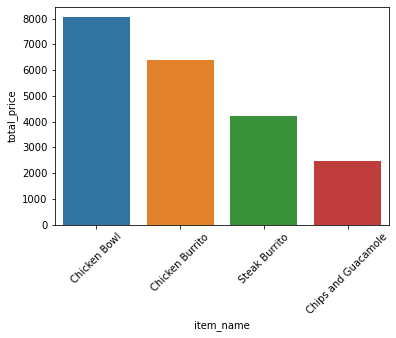

In [30]:
# plot the data
sns.barplot(x=popular_items.index, y='total_price', data=popular_items)
plt.xticks(rotation=45)
plt.show()

## sleepstudy dataset
#### Load the sleepstudy data and read it's documentation. 

In [31]:
sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [32]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


#### Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.


In [33]:
avg_times = sleepstudy.groupby('Days').Reaction.mean().reset_index()
avg_times['Subject'] = 'Average'
avg_times

,Days,Reaction,Subject
0,0,256.651806,Average
1,1,264.495756,Average
2,2,265.361900,Average
3,3,282.992011,Average
4,4,288.649422,Average
5,5,308.518456,Average
6,6,312.178256,Average
7,7,318.750583,Average
8,8,336.629506,Average
9,9,350.851222,Average


In [34]:
sleepstudy2 = pd.concat([sleepstudy, avg_times], ignore_index=True)
sleepstudy2.tail(12)

,Reaction,Days,Subject
178,369.141700,8,372
179,364.123600,9,372
180,256.651806,0,Average
181,264.495756,1,Average
182,265.361900,2,Average
183,282.992011,3,Average
184,288.649422,4,Average
185,308.518456,5,Average
186,312.178256,6,Average
187,318.750583,7,Average


In [35]:
# use a dictionary comprehension to assign a color for each Subject's line
# red for the 'Average', gray for everyone else
palette = {subj: 'red' if subj == 'Average' else 'gray' for subj in sleepstudy2.Subject.unique()}

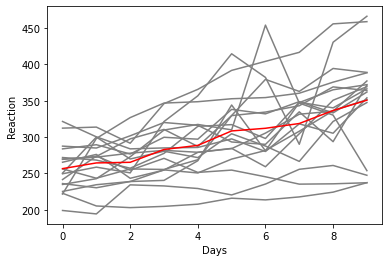

In [36]:
# plot the data
sns.lineplot(x='Days', y='Reaction', data=sleepstudy2,
             hue='Subject', palette=palette, legend=False)
# plt.legend(loc='upper left') --TODO limit legend to only Average line
plt.show()